# Moving Averages

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


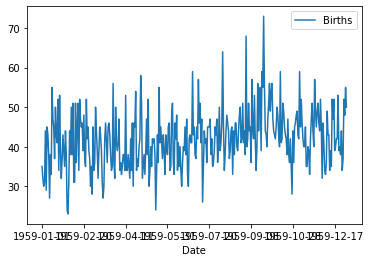

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
print(series.head())
series.plot()
plt.show()

            Births
Date              
1959-01-01     NaN
1959-01-02     NaN
1959-01-03     NaN
1959-01-04     NaN
1959-01-05    34.4
1959-01-06    33.2
1959-01-07    35.8
1959-01-08    38.4
1959-01-09    39.8
1959-01-10    36.4


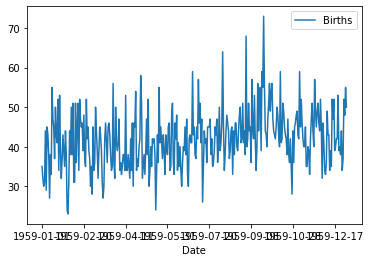

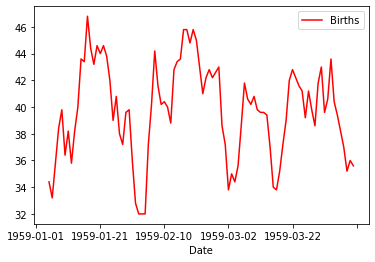

In [10]:
# Tail-rolling average transform
rolling = series[:100].rolling(window=5)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()

In [16]:
#

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


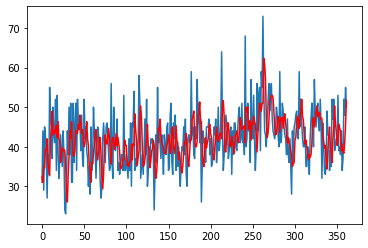

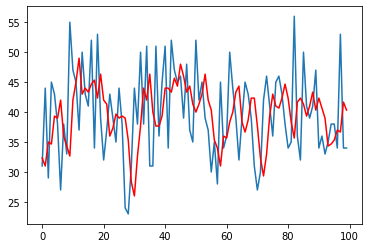

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]


predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = np.mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()

# Simple Exponential Smoothing

In [79]:
data = series.values.reshape(365,)

In [80]:
index = pd.date_range(start='1959', end='1960', freq='D')

In [97]:
final_data = pd.Series(data, index[0:len(index)-1])[:100]

In [104]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

fit1 = SimpleExpSmoothing(final_data).fit(smoothing_level=0.2,optimized=False)

In [105]:
fcast1=fit1.forecast(10)

In [106]:
from statsmodels.tsa.holtwinters import Holt

init = Holt(final_data)
hlt = init.fit(smoothing_level=0.2,smoothing_trend=0.2,optimized=False)

fcast2=hlt.forecast(10)

In [109]:
from statsmodels.tsa.holtwinters import Holt

init = Holt(final_data, exponential=True)
hlt1 = init.fit(smoothing_level=0.2,smoothing_trend=0.2,optimized=False)

fcast3=hlt1.forecast(10)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


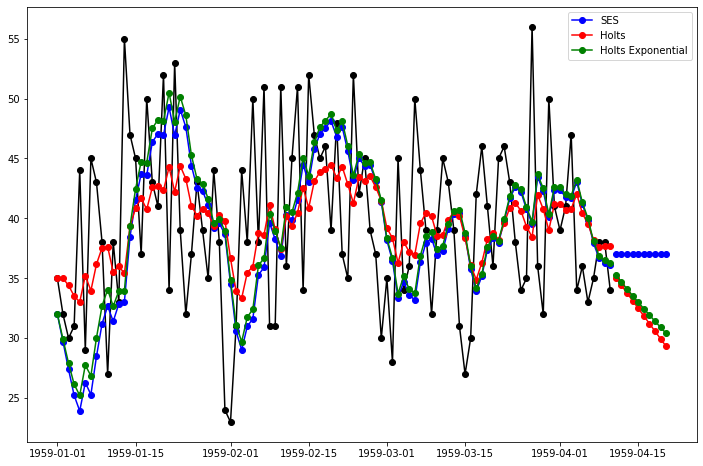

In [110]:
plt.figure(figsize=(12, 8))
plt.plot(final_data, marker='o', color='black')
plt.plot(hlt.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit1.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(hlt1.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], ["SES", "Holts", "Holts Exponential"])

In [112]:
hlt1.aicc,hlt.aicc,fit1.aicc

(434.0936600415944, 436.642418919326, 406.4746651656673)

In [113]:
hlt1.bic,hlt.bic,fit1.bic

(443.61111497909513, 446.1598738568268, 411.26395290606456)